In [224]:
import numpy as np
from numpy import *
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import math
from scipy.optimize import minimize as mini
from scipy.optimize import least_squares as ls
from scipy.optimize import leastsq
import gc
from multiprocessing import Process
#import colorednoise as cn
from numpy import concatenate, real, std, abs, min
from numpy.fft import ifft, fftfreq, fft, rfft, irfft
from numpy.random import normal
import time


In [225]:
MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)

data = np.loadtxt('/home/lynge/MasterP/NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('/home/lynge/MasterP/NOVEMBER/NGC3783_NOISE_K.txt')

time1 = [1,2,3,4,5,6,7,8,9,10]
flux1 = [1,2,5,7,3,1,4,6,7,3]
sigma1 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]


time1 = np.array(time1)
flux1 = np.array(flux1)
sigma1 = np.array(sigma1)

time = np.insert(time1,0,0)
sigma = np.insert(sigma1,0,np.mean(sigma1))
flux = np.insert(flux1,0,np.mean(flux1))

print time1
print sigma1
print flux1



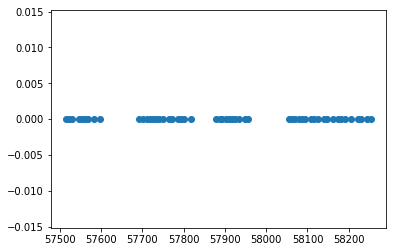

yes
yes
yes
yes
yes
yes 2
yes 2
yes
yes 2
yes
yes
yes 2
yes 2
yes 2
yes 2
[6.53692740e-15 6.53692740e-15 6.68514248e-15 6.71358527e-15
 6.60096834e-15 6.37964425e-15 6.67127211e-15 6.56894523e-15
 6.56946122e-15 6.73956433e-15 6.98789842e-15 7.07148604e-15
 7.16600928e-15 7.44946060e-15 7.59712804e-15 7.59991812e-15
 8.05729361e-15 7.98165151e-15 8.24999301e-15 8.37994436e-15
 9.20294591e-15 9.21068297e-15 9.44032587e-15 9.50610473e-15
 9.73302579e-15 9.80485259e-15 9.78992681e-15 9.83974215e-15
 9.76988550e-15 9.45780882e-15 9.26152396e-15 9.16905037e-15
 9.00022627e-15 9.08750538e-15 8.92810696e-15 8.71962672e-15
 8.86509304e-15 8.82220032e-15 8.69549681e-15 8.84735230e-15
 8.79111873e-15 8.70469323e-15 8.69859061e-15 8.33132789e-15
 8.29606268e-15 8.38661892e-15 8.15085157e-15]
[    0. 57116. 57516. 57523. 57530. 57547. 57554. 57569. 57598. 57693.
 57701. 57711. 57719. 57726. 57733. 57741. 57749. 57764. 57772. 57801.
 57817. 57878. 57887. 57903. 57910. 57918. 57925. 57933. 57949. 57

In [226]:
data = np.loadtxt('NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('NOVEMBER/NGC3783_NOISE_K.txt')

plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.show()

#print data[:,0]
#print data[:,1]
#print error[:,0]
#print error[:,4]


time2 = data[:,0]
flux2 = data[:,1]
sigma2 = error[:,1]

time1 = []
flux1 = []
sigma1 = []
 

for i in range(len(time2)):
    if np.isnan(sigma2[i]):
        print 'yes'
    elif np.isnan(flux2[i]):
        print 'yes 2'
    else:
        time1.append(time2[i])
        flux1.append(flux2[i])
        sigma1.append(sigma2[i])

time1 = np.array(time1)
flux1 = np.array(flux1)
sigma1 = np.array(sigma1)

time1 = np.insert(time1,0,np.min(time1)-400)
flux1 = np.insert(flux1,0,flux1[0])
sigma1 = np.insert(sigma1,0,sigma1[0])

time = np.insert(time1,0,0)
sigma = np.insert(sigma1,0,np.mean(sigma1))
flux = np.insert(flux1,0,np.mean(flux1))

#sigma1 = -2.5*np.log10((flux1 + sigma1)/FLUX_LAMBDA_VEGA_K)
#sigma = -2.5*np.log10((flux + sigma)/FLUX_LAMBDA_VEGA_K)
#flux1 = -2.5*np.log10(flux1/FLUX_LAMBDA_VEGA_K)
#flux = -2.5*np.log10(flux/FLUX_LAMBDA_VEGA_K)

#sigma1 = abs(sigma1 - flux1)
#sigma = abs(sigma - flux)

print flux1

print time
print sigma
print flux

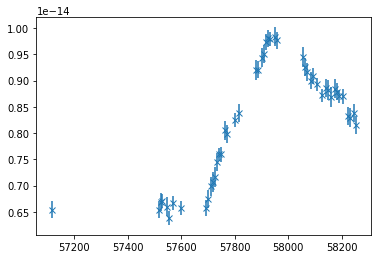

In [227]:
plt.figure()
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
plt.show()

In [228]:
b = 8.*10**(-2)
tau = 300.
sigma_tot = 1*10**(-16)

param = [b,tau,sigma_tot]

In [229]:
'''x denotes the observed fluxes, and t the observation times, 
sigma is the error variances and p is the probability function'''

def a_i(t2,t1,tau):
    tau = float(tau)
    return np.exp(-(t2-t1)/tau)

def omega_0(tau,sigma_tot):
    return 0.5*tau*sigma_tot**2

def omega_i(omega_0,a_i,omega_before,sigma_before):
    return omega_0*(1-a_i**2) + a_i**2*omega_before*(1 - omega_before/(omega_before + sigma_before**2))

def x_hat_i(a_i,x_hat_before,omega_before,sigma_before,x_star_before):
    return a_i*x_hat_before + ((a_i*omega_before)/((omega_before + sigma_before**2)))*(x_star_before - x_hat_before)

def x_star_i(x_i,b,tau):
    return x_i - b*tau


In [230]:
def parameters(param):
    x_hat = [0]
    omega = [0.5*param[1]*param[2]**2]
    x_star = [-param[0]*param[1]]
    a = []
    for i in range(len(flux1)):
        a.append(a_i(time[i+1],time[i],param[1]))
        x_hat.append(x_hat_i(a[i],x_hat[i],omega[i],sigma[i],x_star[i]))
        omega.append(omega_i(omega_0(param[1],param[2]),a[i],omega[i],sigma[i]))
        x_star.append(x_star_i(flux[i+1],param[0],param[1]))
    x_hat[0] = np.mean(x_hat)
    x_hat[1] = np.mean(x_hat)
    return x_hat,omega,x_star,a


In [231]:
def prob(param):
    x_hat,omega,x_star,a = parameters(param)
    #print x_hat
    #print x_star
    #print omega
    
    probability = 1
    for i in range(len(a)):
        #print omega[i+1],sigma[i+1]**2 #,x_hat[i+1],x_star[i+1],a[i]
        #print (x_hat[i+1] - x_star[i+1])
        part = np.log(1/np.sqrt(2*np.pi*(omega[i+1] + sigma[i+1]**2)))\
        -(1/2.)*(((x_hat[i+1] - x_star[i+1])**2.)/(omega[i+1] + sigma[i+1]**2.))
        #print part,sigma1[i]
        #print ((x_hat[i+1] - x_star[i+1])**2.)/(omega[i+1] + sigma[i+1]**2.)
        #print 1/np.sqrt(2*np.pi*(omega[i+1] + sigma[i+1]**2))
        probability += part
        #print part, probability
    return -probability

In [232]:
def dX(tau,sigma,dt,b,epsilon,X):
    dt = dt
    sigma = sigma
    return (-(1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon + b*dt)

def dX(tau,sigma,dt,b,epsilon,X):
    res = 0
    if X < b*tau:
        res = -(1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon + b
    if X > b*tau:
        res = (1/tau)*X*dt + sigma*np.sqrt(dt)*epsilon - b
    return res

In [233]:
def flux_model(param):
    res = mini(prob,param,method='Nelder-Mead',tol=1e-18)
    tau = res.x[1] #1400. #res.x[1] #1400. #res.x[1]
    b = res.x[0] #9.2/tau #res.x[0] #7.5*10**(-15)/tau #res.x[0]
    sigma_tot = res.x[2] #0.01 #res.x[2] #1.3*10**(-16) #res.x[2] 
    time_model = np.arange(time1[:1],time1[-1:],5)
    model = np.zeros((500,len(time_model)))
    flux_test = flux1[0]
    for j in range(len(model[:,0])):
        model[j,0] = flux1[0]
        #flux_model = [flux1[0]]
        #print j
        for i in range(len(time_model)-1):
            #print i, model[j,i]
            idx_model = np.copy(time1)
            idx_model[idx_model <= time_model[i]] = 0
            idx_time = (np.abs(idx_model - time_model[i])).argmin()
            dt = abs(time1[idx_time]-time_model[i])
            epsilon = np.random.normal(0,1,1)
            dX1 = (flux1[idx_time])#*(-1) + model[j,0]
            change = dX(tau,sigma_tot,dt,b,epsilon,dX1) #flux1[i+1] - flux1[i]
            #print change,flux1[i+1]
            model[j,i+1] = change + flux1[idx_time] #model[j,i] # - flux_test)
    model2 = []
    time_model1 = []
    std = []
    for i in range(len(model[0,:])):
        model2.append(np.mean(model[:,i]))
        std.append(np.std(model[:,i]))
        time_model1.append(time_model[i])
    flux_model = np.array((time_model1,model2,std,res.x))
    return flux_model,time_model1, model2

def flux_model1(param):
    res = mini(prob,param,method='Nelder-Mead',tol=1e-18)
    tau = res.x[1] #1400. #res.x[1] #1400. #res.x[1]
    b = res.x[0] #9.2/tau #res.x[0] #7.5*10**(-15)/tau #res.x[0]
    sigma_tot = res.x[2] #0.01 #res.x[2] #1.3*10**(-16) #res.x[2] 
    time_model = np.arange(time1[:1],time1[-1:],5)
    model = np.zeros((500,len(time_model)))
    flux_test = flux1[0]
    for j in range(len(model[:,0])):
        model[j,0] = flux1[0]
        #flux_model = [flux1[0]]
        #print j
        for i in range(len(time_model)-1):
            #print i, model[j,i]
            idx_model = np.copy(time1)
            idx_model[idx_model >= time_model[i]] = 0
            idx_time = (np.abs(idx_model - time_model[i])).argmin()
            dt = abs(time1[idx_time]-time_model[i])
            epsilon = np.random.normal(0,1,1)
            dX1 = (flux1[idx_time])#*(-1) + model[j,0]
            change = dX(tau,sigma_tot,dt,b,epsilon,dX1) #flux1[i+1] - flux1[i]
            #print change,flux1[i+1]
            model[j,i+1] = change + flux1[idx_time] #model[j,i] # - flux_test)
    model2 = []
    time_model1 = []
    std = []
    for i in range(len(model[0,:])):
        model2.append(np.mean(model[:,i]))
        std.append(np.std(model[:,i]))
        time_model1.append(time_model[i])
    flux_model = np.array((time_model1,model2,std,res.x))
    return flux_model,time_model1, model2

#model, time_model, model2 = flux_model(param)


In [234]:
model, time_model, model2 = flux_model(param) #p1.join()
model1, time_model1, model12 = flux_model1(param) #p2.join()
#model = np.add(model,model1)/2.
time_model = np.add(time_model,time_model1)/2.
model2 = np.add(model2,model12)

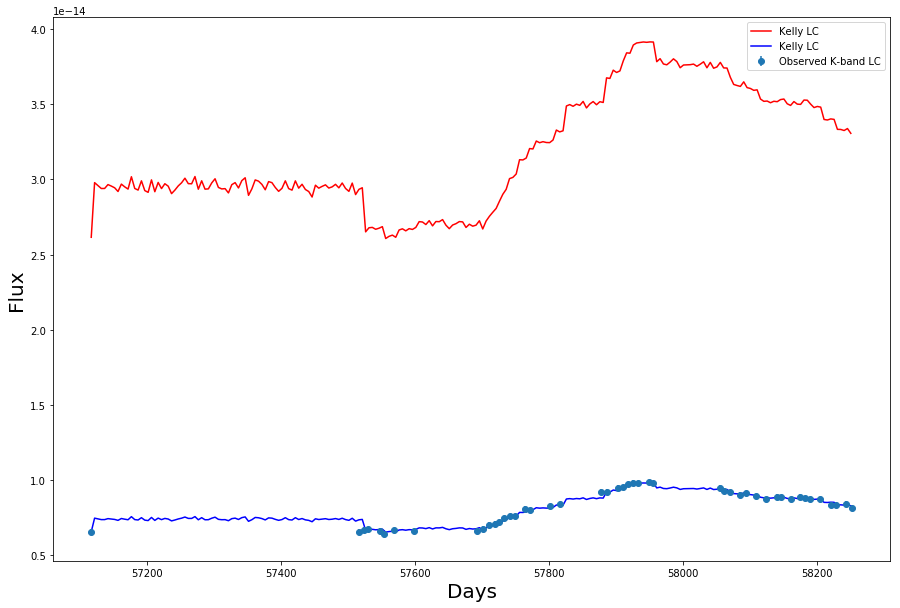

"\nplt.figure(figsize=(15,10))\nplt.errorbar(time1,flux1,yerr=sigma1,fmt='x')\nfor i in range(len(model[:,0])):\n    plt.plot(time1,model[i,:],linestyle='-')\n#plt.ylim([4e-15,1.2e-14])\nplt.show()\n\nplt.figure(figsize=(15,10))\nplt.errorbar(time1,flux1,yerr=sigma1,fmt='x')\n#plt.ylim([4e-15,1.2e-14])\nplt.show()\n"

In [235]:
plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='o',label='Observed K-band LC')
plt.plot(time_model,model2*2,linestyle='-',color='r',label='Kelly LC')
plt.plot(time_model,fft(ifft(model2/2.)).real,linestyle='-',color='b',label='Kelly LC')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.legend()
#plt.errorbar(time_model,model2,yerr=std,fmt='.',color='r')
#plt.ylim([4e-15,1.2e-14])
plt.show()
'''
plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
for i in range(len(model[:,0])):
    plt.plot(time1,model[i,:],linestyle='-')
#plt.ylim([4e-15,1.2e-14])
plt.show()

plt.figure(figsize=(15,10))
plt.errorbar(time1,flux1,yerr=sigma1,fmt='x')
#plt.ylim([4e-15,1.2e-14])
plt.show()
'''

In [236]:
continuum = np.zeros((len(model2),3))
continuum[:,0] = time_model
continuum[:,1] = model2*2

cont_mean = np.nanmean(continuum[:,1])

In [256]:
def powerlaw_psd_gaussian(exponent, samples, mean, fmin=0):
    """Gaussian (1/f)**beta noise.
    """

    # frequencies (we asume a sample rate of one)
    f = fftfreq(samples)

    # scaling factor for all frequencies
    ## though the fft for real signals is symmetric,
    ## the array with the results is not - take neg. half!
    s_scale = abs(concatenate([f[f<0], [f[-1]]]))
    ## low frequency cutoff?!?
    if fmin:
        ix = sum(s_scale>fmin)
        if ix < len(f):
            s_scale[ix:] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)

    # scale random power + phase
    sr = s_scale * normal(size=len(s_scale))
    si = s_scale * normal(size=len(s_scale))
    if not (samples % 2): si[0] = si[0].real

    s = sr + 1J * si
    # this is complicated... because for odd sample numbers,ss
    ## there is one less positive freq than for even sample numbers
    s = concatenate([s[1-(samples % 2):][::-1], s[:-1].conj()])

    # time series
    y = ifft(s).real
    y = y / std(y)
    #y = y*10**(-14.5)
    #y = y*10**np.random.normal(-14.5,1.5,1)[0]
    #y += mean #abs(min(y))
    #y = y / std(y)
    
    
    
    #y*= mean #10**np.random.normal(-13.7,1.5,1)[0]

    #y = rfft(y)
    #y = irfft(y)

    #y1 = y / std(y)
    #print y1

    #y1 = y1

    #y2 = ifft(y1)

    ret = y

    #print 'HEY', ret
    #print 'HEY HO'

    return ret

-1.881767044797525


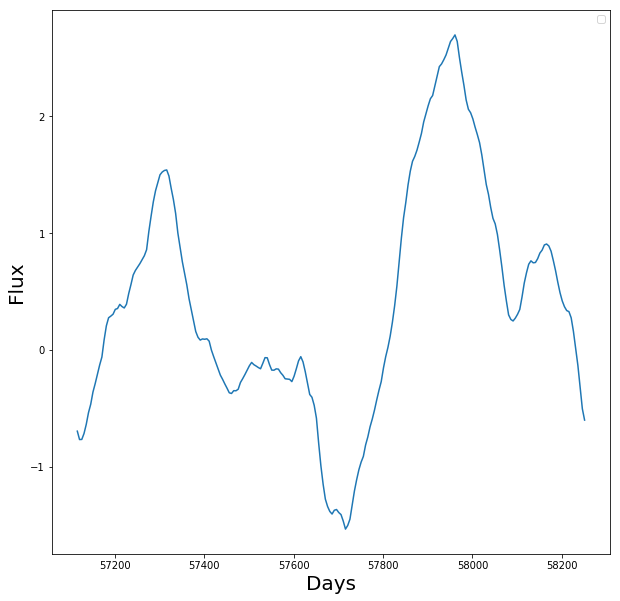

In [291]:
cont_days = continuum[:,0]
freq = []

for i in range(int(len(cont_days)/2.)):
    '''The frequency determination for the PSD'''
    freq.append((i+1)/(60.*60.*24*float(cont_days[len(cont_days)-1] - cont_days[0])))

def PSD(freq,cont):
    '''Code designed to determine the Power Spectral Density Slope'''
    cont1 = cont[:,1] - np.nanmean(cont[:,1]) #Removing zero frequency

    cont_zero_freq = transpose(np.array([cont1,]*len(freq)))
    days_cont = transpose(np.array([cont[:,0],]*len(freq)))
    freq_array = np.array([freq,]*len(cont[:,0]))

    F_N_v = np.sum(cont_zero_freq*np.cos(2*np.pi*freq_array*60.*60.*24*days_cont),axis=0)**2 \
    + np.sum(cont_zero_freq*np.sin(2*np.pi*freq_array*60.*60.*24*days_cont),axis=0)**2

    #print len(cont[:,0]), F_N_v
    P_v = 2*60.*60.*24*float(cont[:,0][len(cont[:,0])-1] - cont[0,0]) \
    /(np.nanmean(cont[:,1])**2*len(cont[:,0])**2)*F_N_v #Finding PSD

    slope = np.polyfit(np.log10(freq),np.log10(P_v),1)[0] #Finding PSD slope

    return slope#, P_v

cont = np.copy(continuum)
cont[:,1] = powerlaw_psd_gaussian(3.8, len(continuum[:,1]), cont_mean, fmin=0)
print PSD(freq,cont)

plt.figure(figsize=(10,10))
plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Days',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.legend()
#plt.errorbar(time_model,model2,yerr=std,fmt='.',color='r')
#plt.ylim([4e-15,1.2e-14])
plt.show()

160.93678582617702


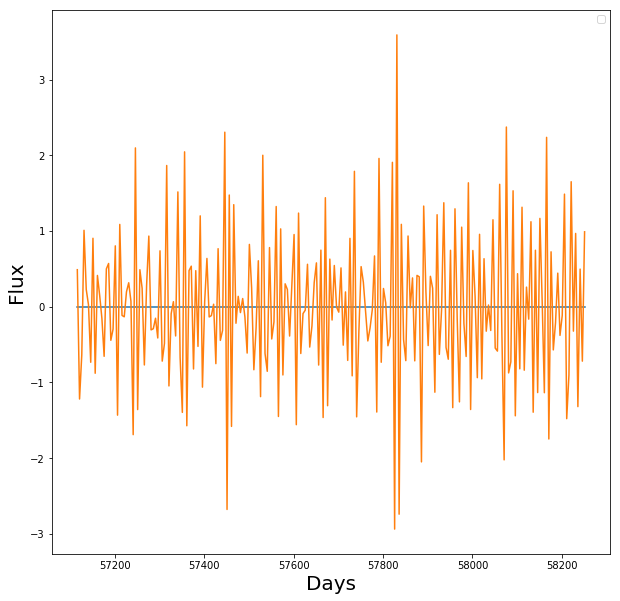

In [269]:
cont_try = powerlaw_psd_gaussian(np.random.normal(2.8,0.25,1)[0], len(continuum[:,1]), cont_mean, fmin=0)
cont_fit = sum((continuum[82:,1] - cont_try[82:])**2)
print cont_fit
for i in range(50000):
    cont_try2 = powerlaw_psd_gaussian(np.random.normal(2.8,0.25,1)[0], len(continuum[:,1]), cont_mean, fmin=0)
    cont_fit2 = sum((continuum[82:,1] - cont_try[82:])**2)
    if cont_fit2 < cont_fit:
        cont_try = np.copy(cont_try2)
        cont_fit = cont_fit2
plt.figure(figsize=(10,10))
plt.plot(continuum[:,0],continuum[:,1])
plt.plot(continuum[:,0],cont_try[:])
plt.xlabel('Days',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.legend()
#plt.errorbar(time_model,model2,yerr=std,fmt='.',color='r')
#plt.ylim([4e-15,1.2e-14])
plt.show()


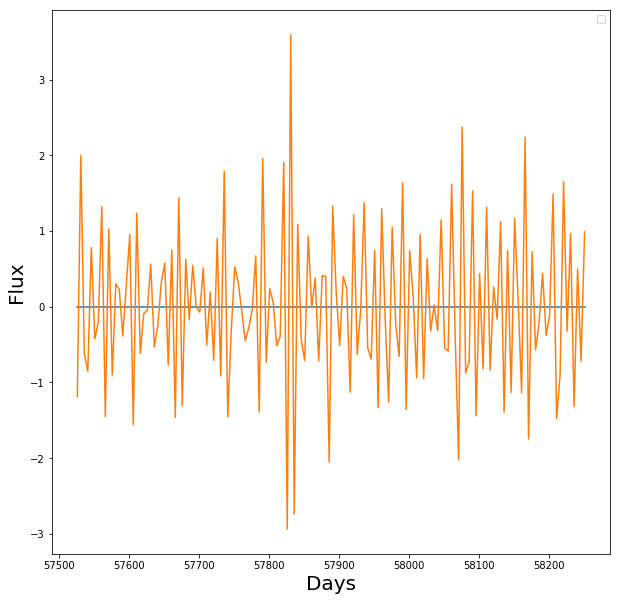

In [270]:
plt.figure(figsize=(10,10))
plt.plot(continuum[82:,0],continuum[82:,1])
plt.plot(continuum[82:,0],cont_try[82:])
plt.xlabel('Days',fontsize=20)
plt.ylabel('Flux',fontsize=20)
plt.legend()
#plt.errorbar(time_model,model2,yerr=std,fmt='.',color='r')
#plt.ylim([4e-15,1.2e-14])
plt.show()

In [241]:
print fft(ifft(continuum[:,1])).real
continuum[:,1] = cont_try

[2.61477096e-14 2.97867929e-14 2.95957869e-14 2.93969481e-14
 2.93989825e-14 2.96565469e-14 2.95575980e-14 2.94434758e-14
 2.91960844e-14 2.96883860e-14 2.95072837e-14 2.93573027e-14
 3.01796223e-14 2.93995103e-14 2.92913184e-14 2.99061292e-14
 2.92577559e-14 2.91410240e-14 2.99696656e-14 2.91825299e-14
 2.97994184e-14 2.93913321e-14 2.97135491e-14 2.95519171e-14
 2.90542659e-14 2.92913596e-14 2.95690398e-14 2.97783513e-14
 3.00821526e-14 2.97196636e-14 2.97099809e-14 3.01932092e-14
 2.93492322e-14 2.99083278e-14 2.93535404e-14 2.93709884e-14
 2.97650753e-14 3.00453111e-14 2.94681437e-14 2.93679314e-14
 2.93883613e-14 2.91020068e-14 2.96502722e-14 2.97880284e-14
 2.94314733e-14 2.99193207e-14 3.01112655e-14 2.89407848e-14
 2.93704196e-14 2.99677563e-14 2.98843345e-14 2.96704112e-14
 2.93122610e-14 2.98553032e-14 2.97858919e-14 2.94648180e-14
 2.92078638e-14 2.94070157e-14 2.99063499e-14 2.93905443e-14
 2.92877680e-14 2.99045446e-14 2.94194087e-14 2.96781227e-14
 2.93301877e-14 2.919449

In [242]:
np.savetxt('NOVEMBER/NGC3783_CONT_TRY',continuum)

'''
def flux_model1(param):
    res = mini(prob,param,method='Nelder-Mead',tol=1e-18)
    tau = res.x[1] #1400. #res.x[1] #1400. #res.x[1]
    b = res.x[0] #9.2/tau #res.x[0] #7.5*10**(-15)/tau #res.x[0]
    sigma_tot = res.x[2] #0.01 #res.x[2] #1.3*10**(-16) #res.x[2] 
    flux_test = flux1[0]
    timef = time1[::-1]
    fluxf = flux1[::-1]
    model = np.zeros((500,abs(int(timef[-1:])-int(timef[:1]))))
    dx_day = np.zeros((500,abs(int(timef[-1:])-int(timef[:1]))))
    time_model = np.arange(timef[-1:],timef[:1],1)
    #print timef, time1
    for j in range(len(model[:,0])):
        model[j,0] = fluxf[0]
        for i in range(len(model[:,0])-1):
            idx_model = np.copy(timef)
            idx_model[idx_model >= time_model[i]] = 0
            idx_time = (np.abs(idx_model - time_model[i])).argmin()
            dt = abs(timef[idx_time]-time_model[i])
            epsilon = np.random.normal(0,1,1)
            dX1 = (fluxf[idx_time])#*(-1) + model[j,0]
            change = dX(tau,sigma_tot,dt,b,epsilon,dX1) #flux1[i+1] - flux1[i]
            model[j,i+1] = change + fluxf[idx_time] #model[j,i] # - flux_test)
            dx_day[j,i+1] = change/dt
            #print 2
    model2 = []
    time_model1 = []
    std = []
    dx_days = []
    for i in range(len(model[0,:])):
        model2.append(np.mean(model[:,i]))
        std.append(np.std(model[:,i]))
        time_model1.append(time_model[i])
        dx_days.append(np.mean(dx_day[:,i]))
        #print 2
    flux_model = np.array((time_model1,model2,std,res.x))
    return flux_model,time_model1, model2, dx_days
'''

In [243]:
x = np.zeros((4,8))
x = np.insert(x,0,[1,2,3,4],axis=1)

In [244]:
print x

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0.]]
